In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', family = "NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False

df_order = pd.read_csv("log_order_sheet_000.csv")

# 공급원가 정제

In [3]:
# 공급원가 결측치

df_order["공급원가"].isnull().sum()

df_cost = df_order[df_order["공급원가"].isnull()]
df_cost["배송시작일"].unique()

array(['2017-02-22 오후 12:03', '2017-03-03 오후 4:12', '2017-03-27 오후 5:06',
       '2017-03-31 오후 7:37', '2017-04-03 오후 5:17', '2017-04-04 오후 5:25',
       '2017-04-08 오후 6:50', '2017-04-12 오후 7:34', '2017-04-17 오후 7:10',
       '2017-04-18 오후 6:26', '2017-04-21 오후 5:25', '2017-04-24 오후 7:44',
       '2017-04-25 오후 6:59', '2017-05-02 오후 6:57', '2017-05-02 오후 6:58',
       '2017-05-09 오전 11:21', '2017-05-04 오후 3:50', '2017-05-18 오전 9:52',
       '2017-05-11 오전 8:39', '2017-05-10 오후 10:20', '2017-05-12 오후 9:44',
       '2017-05-18 오전 9:54', '2017-05-18 오후 4:58', '2017-05-15 오후 5:03',
       '2017-05-18 오후 4:57', '2017-05-18 오후 5:28', '2017-05-19 오후 12:16',
       '2017-05-19 오후 4:06', '2017-05-25 오전 8:03', '2017-05-23 오전 10:44',
       '2017-05-22 오후 3:40', '2017-05-24 오전 9:43', '2017-05-24 오후 4:45',
       '2017-05-23 오후 3:50', '2017-05-24 오후 4:46', '2017-05-24 오후 4:44',
       '2017-05-24 오후 12:32', '2017-05-26 오후 4:19', '2017-05-26 오후 1:58',
       '2017-05-29 오후 4:33', '2017-05-30 오전 7

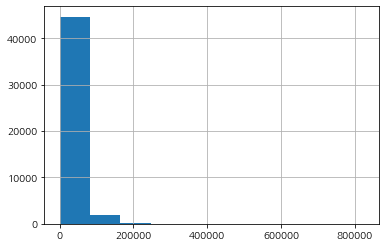

In [4]:
df_order["공급원가"].hist()

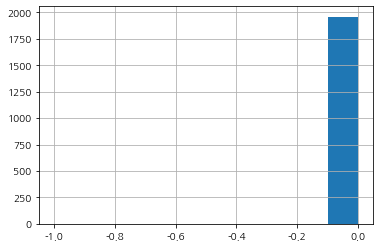

In [5]:
df_order["공급원가"].hist(range = (-1, 0)) # 결측치 처리 전 현황 확인 : 범위가 너무 넓어서 안보이길레 범위 줄임

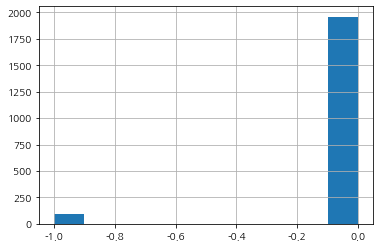

In [6]:
# 공급원가 결측치 처리 : 2017년 전산 시스템 구축전 자료로 유추, -1의 특이값을 넣어준다.

df_order.loc[df_order["공급원가"].isnull(), "공급원가"] = -1

df_order["공급원가"].hist(range = (-1, 0)) # 결측치들을 -1이라는 특이 값으로 대처

# 상품명 정제 : 결측치

In [7]:
# 상품명 결측치 확

df_order["상품명"].isnull().sum()

df_name = df_order[df_order["상품명"].isnull()]

df_name["배송시작일"].unique() # 전부다 2017년 상품! : 아마 창업한 2017년에는 시스템 구축이 안된듯하다!

#df_order["상품명"].isnull

array(['2017-02-22 오후 12:03', '2017-03-03 오후 4:12', '2017-03-27 오후 5:06',
       '2017-03-31 오후 7:37', '2017-04-03 오후 5:17', '2017-04-04 오후 5:25',
       '2017-04-08 오후 6:50', '2017-04-12 오후 7:34', '2017-04-17 오후 7:10',
       '2017-04-18 오후 6:26', '2017-04-21 오후 5:25', '2017-04-24 오후 7:44',
       '2017-04-25 오후 6:59', '2017-05-02 오후 6:57', '2017-05-02 오후 6:58',
       '2017-05-09 오전 11:21', '2017-05-04 오후 3:50', '2017-05-18 오전 9:52',
       '2017-05-11 오전 8:39', '2017-05-10 오후 10:20', '2017-05-12 오후 9:44',
       '2017-05-18 오전 9:54', '2017-05-18 오후 4:58', '2017-05-15 오후 5:03',
       '2017-05-18 오후 4:57', '2017-05-18 오후 5:28', '2017-05-19 오후 12:16',
       '2017-05-19 오후 4:06', '2017-05-25 오전 8:03', '2017-05-23 오전 10:44',
       '2017-05-22 오후 3:40', '2017-05-24 오전 9:43', '2017-05-24 오후 4:45',
       '2017-05-23 오후 3:50', '2017-05-24 오후 4:46', '2017-05-24 오후 4:44',
       '2017-05-24 오후 12:32', '2017-05-26 오후 4:19', '2017-05-26 오후 1:58',
       '2017-05-29 오후 4:33', '2017-05-30 오전 7

In [8]:
len(df_order[df_order["상품명"] == "2017년 상품"]) # 2017년 상품으로 검색되는 상품이 하나도 없다!

0

In [9]:
# 상품명 결측치 처리

df_order.loc[df_order["상품명"].isnull(), "상품명"] = "2017년 상품"

len(df_order[df_order["상품명"] == "2017년 상품"]) # 결측치들을 "2017년 상품"이라는 특이 값으로 대처한 결과

88

# 상품명 정제 : 친환경 파생 변수

In [10]:
len(df_order.columns)

24

In [11]:
contains_flag = df_order["상품명"].str.contains("친환경")

df_order["친환경"] = contains_flag

In [12]:
df_order[["상품명", "친환경"]]

,상품명,친환경
0,195파이 탕용기 소 300개 1set(2박스),False
1,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",False
2,비닐봉투 배달중 중 백색 200개,False
3,195파이 미니탕용기 투톤 300개 1set(2박스),False
4,250파이 원형 접시 미니 블랙 400개 1박스,False
...,...,...
46744,PP 4칸 도시락용기 A 200개 1박스,False
46745,PP 6칸 도시락용기 02 200개 1박스,False
46746,"170mm 수저 투명 1,500개 1박스",False
46747,170파이 원형 샐러드 3칸 150ml x 3 검정 400개 1set(2박스),False


In [13]:
len(df_order.columns)

25

# 상품명 정제 : 사은품 파생 변수

In [14]:
len(df_order.columns)

25

In [15]:
contains_flag = df_order["상품명"].str.contains("사은품")

df_order["사은품"] = contains_flag

In [16]:
df_order[["상품명", "사은품"]]

,상품명,사은품
0,195파이 탕용기 소 300개 1set(2박스),False
1,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",False
2,비닐봉투 배달중 중 백색 200개,False
3,195파이 미니탕용기 투톤 300개 1set(2박스),False
4,250파이 원형 접시 미니 블랙 400개 1박스,False
...,...,...
46744,PP 4칸 도시락용기 A 200개 1박스,False
46745,PP 6칸 도시락용기 02 200개 1박스,False
46746,"170mm 수저 투명 1,500개 1박스",False
46747,170파이 원형 샐러드 3칸 150ml x 3 검정 400개 1set(2박스),False


In [17]:
len(df_order.columns)

26

# 상품번호 정제 : 결측치

In [18]:
# 공급원가 결측치

df_order["상품번호"].isnull().sum()

df_product_id = df_order[df_order["상품번호"].isnull()]
df_product_id["배송시작일"].unique() # 전부 2017년도 상품

array(['2017-02-22 오후 12:03', '2017-03-03 오후 4:12', '2017-03-27 오후 5:06',
       '2017-03-31 오후 7:37', '2017-04-03 오후 5:17', '2017-04-04 오후 5:25',
       '2017-04-08 오후 6:50', '2017-04-12 오후 7:34', '2017-04-17 오후 7:10',
       '2017-04-18 오후 6:26', '2017-04-21 오후 5:25', '2017-04-24 오후 7:44',
       '2017-04-25 오후 6:59', '2017-05-02 오후 6:57', '2017-05-02 오후 6:58',
       '2017-05-09 오전 11:21', '2017-05-04 오후 3:50', '2017-05-18 오전 9:52',
       '2017-05-11 오전 8:39', '2017-05-10 오후 10:20', '2017-05-12 오후 9:44',
       '2017-05-18 오전 9:54', '2017-05-18 오후 4:58', '2017-05-15 오후 5:03',
       '2017-05-18 오후 4:57', '2017-05-18 오후 5:28', '2017-05-19 오후 12:16',
       '2017-05-19 오후 4:06', '2017-05-25 오전 8:03', '2017-05-23 오전 10:44',
       '2017-05-22 오후 3:40', '2017-05-24 오전 9:43', '2017-05-24 오후 4:45',
       '2017-05-23 오후 3:50', '2017-05-24 오후 4:46', '2017-05-24 오후 4:44',
       '2017-05-24 오후 12:32', '2017-05-26 오후 4:19', '2017-05-26 오후 1:58',
       '2017-05-29 오후 4:33', '2017-05-30 오전 7

In [19]:
len(df_order[df_order["상품번호"] == "2017년 상품번호"])

/home/piai/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


0

In [20]:
# 상품명 결측치 처리

df_order.loc[df_order["상품번호"].isnull(), "상품번호"] = "2017년 상품번호"

len(df_order[df_order["상품번호"] == "2017년 상품번호"]) # 결측치들을 "2017년 상품번호"이라는 특이 값으로 대처

88

# 주문자 ID : 회원 파생 변수

In [21]:
len(df_order.columns)

26

In [22]:
null_flag = df_order["주문자ID"].isnull()

In [23]:
df_order["회원"] = ~null_flag

In [24]:
df_order[["주문자ID", "회원"]]

,주문자ID,회원
0,pp683,True
1,asd0908,True
2,NaN,False
3,23533593@n,True
4,romandoll,True
...,...,...
46744,73987748@n,True
46745,chuheesuk,True
46746,NaN,False
46747,NaN,False


In [25]:
len(df_order.columns)

27

# 카드사 : 결측치

In [26]:
df_order["카드사"].isnull().sum()

30138

In [27]:
df_order["카드사"]

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
46744         국민
46745         비씨
46746         기타
46747         기타
46748    NH (농협)
Name: 카드사, Length: 46749, dtype: object

In [28]:
df_order.loc[df_order["카드사"].isnull(), "카드사"] = "기타"

In [29]:
df_order["카드사"]

0             기타
1             기타
2             기타
3             기타
4             기타
          ...   
46744         국민
46745         비씨
46746         기타
46747         기타
46748    NH (농협)
Name: 카드사, Length: 46749, dtype: object

In [30]:
df_order["카드사"].isnull().sum()

0

# 회원 구분 : drop

In [31]:
len(df_order.columns)

27

In [32]:
df_order.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호', '친환경', '사은품', '회원'],
      dtype='object')

In [33]:
df_order = df_order.drop(["주문 시 회원등급"], axis = 1)

In [34]:
df_order.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가', '품목번호', '친환경',
       '사은품', '회원'],
      dtype='object')

In [35]:
len(df_order.columns)

26

# 파생 수량 : 주문수량과 총수량

In [36]:
import re

In [37]:
df_order.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가', '품목번호', '친환경',
       '사은품', '회원'],
      dtype='object')

In [38]:
count_list = []
efficient_list = []

for name in df_order["상품명"]:
    count = ["1"]
    efficient = ["1"]
    
    name = re.sub("[-=+#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]", " ", name)
    name = re.sub(",", "", name)
    print("name : ", name)
    
    for splitted_name in name.split():
        
        p = re.compile("[\d]+")
        
        if "개" in splitted_name:
            if "낱개" in splitted_name:
                continue
            count = p.findall(splitted_name)
            continue
            
        elif "롤" in splitted_name:
            if "롤백" in splitted_name:
                continue
            count = p.findall(splitted_name)
            continue
            
        elif "P" in splitted_name:
            if "PP" in splitted_name:
                continue
            count = p.findall(splitted_name)
            continue
            
        elif "캔" in splitted_name:
            count = p.findall(splitted_name)
            continue
            
        elif "팩" in splitted_name:
            count = p.findall(splitted_name)
            continue
            
        elif "매" in splitted_name:
            if "구매" in splitted_name:
                continue
            count = p.findall(splitted_name)
            continue
            
        elif "set" in splitted_name:
            efficient = p.findall(splitted_name)
            break
        
        elif "박스" in splitted_name:
            efficient = p.findall(splitted_name)
            break
    
    if len(count) == 0:
        count = ["1"]
    if len(efficient) == 0:
        efficient = ["1"]
    
    
    count_list.append(int(count[0]))
    efficient_list.append(int(efficient[0]))

name :  195파이 탕용기 소 300개 1set 2박스 
name :  95파이 다용도컵 세트 4호 소 200ml 백색 PS 1000개 1set 2박스 
name :  비닐봉투 배달중 중 백색 200개
name :  195파이 미니탕용기 투톤 300개 1set 2박스 
name :  250파이 원형 접시 미니 블랙 400개 1박스
name :  210파이 중화면용기 중 300개 1박스
name :  105파이 다용도컵 세트 5호 대 370ml 블랙 PS 1000개 1set 2박스 
name :  210파이 중화면용기 소 300개 1박스
name :  210파이 중화면용기 중 300개 1박스
name :  210파이 중화면용기 대 400개 1박스
name :  270파이 원형 접시 소 블랙 200개 1박스
name :  300파이 원형 접시 대 블랙 200개 1박스
name :  105파이 다용도컵 세트 5호 대 370ml 블랙 PS 1000개 1set 2박스 
name :  210파이 중화면용기 소 300개 1박스
name :  210파이 중화면용기 중 300개 1박스
name :  210파이 중화면용기 대 400개 1박스
name :  210파이 중화면용기 소 300개 1박스
name :  210파이 중화면용기 중 300개 1박스
name :  210파이 중화면용기 대 400개 1박스
name :  210파이 중화면용기 중 300개 1박스
name :  195파이 탕용기 소 300개 1set 2박스 
name :  사각 찜용기 소 2000ml 200개 1set 2박스 
name :  195파이 미니탕용기 블랙 300개 1set 2박스 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  반찬용기 104 1칸 블랙 900개 1set 2박스 
name :  210파이 탕용기 대 백색 200개 1set 2박스 
name :  210파이 중화면용기 소 300개 1박

name :  195파이 탕용기 대 300개 1set 2박스 
name :  사각 죽용기 중 920ml 500개 1set 2박스 
name :  95파이 다용도컵 세트 4호 대 270ml 백색 PS 1000개 1set 2박스 
name :  170mm 수저 투명 1500개 1박스
name :  270파이 탕용기 왕대 6500ml 100개 1set 1박스 
name :  사각 죽용기 특대 1150ml 500개 1set 2박스 
name :  210파이 중화면용기 대 300개 1박스
name :  195파이 탕용기 대 300개 1set 2박스 
name :  125파이 원형용기 소 250ml 백색 PP 600개 1set 2박스 
name :  225파이 탕용기 소 1800ml 200개 1set 2박스 
name :  225파이 탕용기 대 3000ml 200개 1set 2박스 
name :  225파이 탕용기 중 2400ml 200개 1set 2박스 
name :  225파이 탕용기 소 1800ml 200개 1set 2박스 
name :  240파이 탕용기 특대 5000ml 100개 1set 1박스 
name :  195파이 탕용기 소 300개 1set 2박스 
name :  비닐봉투 맛난거들었쪙 중 백색 200개
name :  반찬용기 105 1칸 투명 900개 1set 2박스 
name :  사각 죽용기 대 1050ml 500개 1set 2박스 
name :  사각 죽용기 소 550ml 500개 1set 2박스 
name :  실링용기 23197 백색 2000ml 400개 1박스
name :  195파이 탕용기 소 300개 1set 2박스 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  사각 죽용기 중 920ml 500개 1set 2박스 
name :  210파이 탕용기 소 백색 200개 1set 2박스 
name :  198mm  7치  대나무젓가락 1500개 끝내젓갈
name :  225파이 탕용기 소 1800ml 200개 1s

name :  195파이 탕용기 소 300개 1set 2박스 
name :  사각 죽용기 소 550ml 500개 1set 2박스 
name :  사각 죽용기 중 920ml 500개 1set 2박스 
name :  실링용기 2 5호  21호  백색 900ml 800개 1박스
name :  실링용기 2호 백색 1150ml 800개 1박스
name :  비닐봉투 배달중 대 백색 200개
name :  비닐봉투 무지 중 백색 200개
name :  105파이 다용도컵 세트 5호 소 250ml 백색 PS 1000개 1set 2박스 
name :  125파이 원형용기 소 250ml 백색 PP 600개 1set 2박스 
name :  105파이 다용도컵 세트 5호 대 370ml 블랙 PS 1000개 1set 2박스 
name :  240파이 탕용기 특대 5000ml 100개 1set 1박스 
name :  고강도 감자탕용기 대 200개 1set 2박스 
name :  PP 6칸 도시락용기 02 200개 1박스
name :  195파이 미니탕용기 투톤 300개 1set 2박스 
name :  125파이 원형용기 대 450ml 백색 PP 600개 1set 2박스 
name :  95파이 다용도컵 세트 4호 대 270ml 블랙 PS 1000개 1set 2박스 
name :  70파이 다용도컵 세트 1호 특소 50ml 백색 PS 3000개 1set 2박스 
name :  PP 8칸 도시락용기 L3 200개 1박스
name :  105파이 다용도컵 세트 5호 소 250ml 블랙 PS 1000개 1set 2박스 
name :  225파이 탕용기 소 1800ml 200개 1set 2박스 
name :  반찬용기 201 1칸 투명 1000개 1set 2박스 
name :  195파이 미니탕용기 블랙 300개 1set 2박스 
name :  225파이 탕용기 대 3000ml 200개 1set 2박스 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  225파이 

name :  210파이 중화면용기 대 300개 1박스
name :  225파이 탕용기 대 3000ml 200개 1set 2박스 
name :  225파이 탕용기 중 2400ml 200개 1set 2박스 
name :  PP 5칸 도시락용기 04 200개 1박스 작은 사이즈 
name :  비닐봉투 무지 중 백색 1000개
name :  PP 4칸 도시락용기 A 200개 1박스
name :  사각 죽용기 대 1050ml 500개 1set 2박스 
name :  210파이 중화면용기 대 300개 1박스
name :  210파이 중화면용기 소 300개 1박스
name :  225파이 탕용기 중 2400ml 200개 1set 2박스 
name :  225파이 탕용기 대 3000ml 200개 1set 2박스 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  105파이 다용도컵 세트 5호 중 300ml 백색 PS 1000개 1set 2박스 
name :  210파이 중화면용기 중 300개 1박스
name :  다시 2kg 6팩 1박스
name :  PP 5칸 도시락용기 04 200개 1박스 작은 사이즈 
name :  사각 죽용기 중 920ml 500개 1set 2박스 
name :  사각 죽용기 특대 1150ml 500개 1set 2박스 
name :  225파이 탕용기 중 2400ml 200개 1set 2박스 
name :  195파이 탕용기 소 300개 1set 2박스 
name :  70파이 다용도컵 세트 1호 소 70ml 블랙 PS 3000개 1set 2박스 
name :  비닐봉투 맛난거들었쪙 중 백색 200개
name :  PP 4칸 도시락용기 B 200개 1박스
name :  170mm 수저 투명 1500개 1박스
name :  225파이 탕용기 중 2400ml 200개 1set 2박스 
name :  225파이 탕용기 소 1800ml 200개 1set 2박스 
name :  105파이 다용도컵 세트 5호 소 250ml 블랙 

name :  210파이 중화면용기 대 300개 1박스
name :  105파이 다용도컵 세트 5호 소 250ml 백색 PS 1000개 1set 2박스 
name :  225파이 탕용기 소 1800ml 200개 1set 2박스 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  225파이 탕용기 대 3000ml 200개 1set 2박스 
name :  위생 장갑 150매 10개
name :  쿠킹호일 50개 1박스
name :  실링용기 3 5호 검정 500ml 1200개 1박스
name :  210파이 중화면용기 대 300개 1박스
name :  210파이 중화면용기 중 300개 1박스
name :  210파이 중화면용기 소 300개 1박스
name :  비닐봉투 맛난거들었쪙 중 백색 200개
name :  반찬용기 202 1칸 블랙 1000개 1set 2박스 
name :  300파이 원형 접시 대 백색 200개 1박스
name :  210파이 탕용기 소 백색 200개 1set 2박스 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  225파이 탕용기 소 1800ml 200개 1set 2박스 
name :  198mm  7치  대나무젓가락 1500개 끝내젓갈
name :  170mm 수저 백색 1500개 1박스
name :  비닐봉투 무지 중 백색 2000개
name :  비닐봉투 무지 대 백색 2000개
name :  105파이 다용도컵 세트 5호 특대 400ml 백색 PS 1000개 1set 2박스 
name :  105파이 다용도컵 세트 5호 중 300ml 백색 PS 1000개 1set 2박스 
name :  고강도 감자탕용기 소 200개 1set 2박스 
name :  사각 찜용기 소 2000ml 200개 1set 2박스 
name :  비닐봉투 무지 대 백색 200개
name :  비닐봉투 무지 중 백색 200개
name :  사각 죽용기 대 1050ml 500개 1set 2박스 
name :

name :  105파이 다용도컵 세트 5호 소 250ml 백색 PS 1000개 1set 2박스 
name :  105파이 다용도컵 세트 5호 대 370ml 백색 PS 1000개 1set 2박스 
name :  105파이 다용도컵 세트 5호 소 250ml 블랙 PS 1000개 1set 2박스 
name :  195파이 미니탕용기 블랙 300개 1set 2박스 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  PP 4칸 사각찬용기 300개 1set 2박스 
name :  210파이 중화면용기 소 300개 1박스
name :  210파이 중화면용기 대 300개 1박스
name :  210파이 중화면용기 중 300개 1박스
name :  75파이 다용도컵 세트 3호 소 150ml 백색 PS 3000개 1set 2박스 
name :  PP 8칸 도시락용기 L3 200개 1박스
name :  210파이 중화면용기 대 300개 1박스
name :  210파이 중화면용기 중 300개 1박스
name :  270파이 원형 접시 소 블랙 200개 1박스
name :  95파이 다용도컵 세트 4호 대 270ml 백색 PS 1000개 1set 2박스 
name :  225파이 탕용기 소 1800ml 200개 1set 2박스 
name :  비닐봉투 무지 중 백색 200개
name :  210파이 중화면용기 중 300개 1박스
name :  210파이 중화면용기 중 300개 1박스
name :  210파이 중화면용기 소 300개 1박스
name :  210파이 중화면용기 중 300개 1박스
name :  반찬용기 D 363 3칸 투명 400개 1set 2박스 
name :  195파이 미니탕용기 블랙 300개 1set 2박스 
name :  225파이 탕용기 대 3000ml 200개 1set 2박스 
name :  225파이 탕용기 중 2400ml 200개 1set 2박스 
name :  225파이 탕용기 대 3000ml 200개 1set 2박스 
na

name :  105파이 다용도컵 세트 5호 소 250ml 백색 PS 1000개 1set 2박스 
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  225파이 탕용기 대 3000ml 200개 1set 2박스 
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  70파이 다용도컵 세트 1호 소 70ml 백색 PS 3000개 1set 2박스 
name :  95파이 다용도컵 세트 4호 소 200ml 백색 PS 1000개 1set 2박스 
name :  210파이 중화면용기 중 300개 1박스
name :  210파이 중화면용기 소 300개 1박스
name :  210파이 중화면용기 중 300개 1박스
name :  210파이 중화면용기 소 300개 1박스
name :  단무지 3칸 1000개 1박스
name :  단무지 2칸 1200개 1박스
name :  70파이 다용도컵 세트 1호 소 70ml 백색 PS 3000개 1set 2박스 
name :  PP 6칸 도시락용기 02 200개 1박스
name :  225파이 탕용기 소 1800ml 200개 1set 2박스 
name :  105파이 다용도컵 세트 5호 소 250ml 블랙 PS 1000개 1set 2박스 
name :  195파이 미니탕용기 블랙 300개 1set 2박스 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  우동용기 중 백색 400개 1박스
name :  PP 5칸 도시락용기 04 200개 1박스 작은 사이즈 
name :  195파이 탕용기 소 300개 1set 2박스 
name :  105파이 다용도컵 세트 5호 대 370ml 백색 PS 1000개 1set 2박스 
name :  195파이 탕용기 소 300개 1set 2박스 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  195파이 탕용기 소 300개 1set 2박스 
name :  210파이 중화면용기 소 300

name :  198mm  7치  대나무젓가락 1500개 끝내젓갈
name :  우동용기 대 검정 400개 1박스
name :  195파이 탕용기 대 300개 1set 2박스 
name :  275파이 타원 접시 블랙 200개 1박스
name :  우동용기 중 검정 400개 1박스
name :  210파이 중화면용기 중 300개 1박스
name :  195파이 미니탕용기 블랙 300개 1set 2박스 
name :  160 실링필름 Hold 160mm x 200 meter 투명 무지 4롤 1박스
name :  반찬용기 105 1칸 투명 900개 1set 2박스 
name :  비닐봉투 배달중 소 백색 200개
name :  195파이 탕용기 소 300개 1set 2박스 
name :  105파이 다용도컵 세트 5호 소 250ml 백색 PS 1000개 1set 2박스 
name :  70파이 다용도컵 세트 1호 특소 50ml 백색 PS 3000개 1set 2박스 
name :  PP 4칸 도시락용기 A 200개 1박스
name :  195파이 탕용기 소 300개 1set 2박스 
name :  비닐봉투 맛난거들었쪙 소 백색 200개
name :  비닐봉투 맛난거들었쪙 중 백색 200개
name :  비닐봉투 맛난거들었쪙 대 백색 200개
name :  190파이 고강도 미니탕용기 백색 400개 1set 2박스 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  195파이 미니탕용기 백색 300개 1set 2박스 
name :  210파이 중화면용기 중 300개 1박스
name :  225파이 탕용기 소 1800ml 200개 1set 2박스 
name :  실링용기 3호 백색 650ml 1200개 1박스
name :  210파이 탕용기 소 백색 200개 1set 2박스 
name :  250파이 원형 접시 미니 블랙 400개 1박스
name :  300파이 원형 접시 대 블랙 200개 1박스
name :  195파이 탕용기 소 300개 

name :  210파이 중화면용기 대 300개 1박스
name :  사각 죽용기 대 2칸 920ml 500개 1set 2박스 
name :  비닐봉투 맛난거들었쪙 중 백색 200개
name :  195파이 미니탕용기 투톤 300개 1set 2박스 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  130파이 찬용기 중 250ml 800개 1set 2박스 
name :  70파이 다용도컵 세트 1호 소 70ml 백색 PS 3000개 1set 2박스 
name :  사각 죽용기 신형 중 750ml 500개 1set 2박스 
name :  195파이 탕용기 소 300개 1set 2박스 
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  반찬용기 105 1칸 투명 900개 1set 2박스 
name :  PP 6칸 도시락용기 L1 200개 1박스
name :  195파이 미니탕용기 블랙 300개 1set 2박스 
name :  우동용기 중 검정 400개 1박스
name :  우동용기 특대 검정 400개 1박스
name :  단무지 2칸 1200개 1박스
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  사각 죽용기 신형 중 750ml 500개 1set 2박스 
name :  210파이 탕용기 소 백색 200개 1set 2박스 
name :  고강도 감자탕용기 소 200개 1set 2박스 
name :  실링용기 3 5A 백색 5칸 800개 1박스
name :  PP 8칸 도시락용기 L3 200개 1박스
name :  240파이 탕용기 특대 5000ml 100개 1set 1박스 
name :  195파이 미니탕용기 블랙 300개 1set 2박스 
name :  170파이 원형 샐러드 4칸 100ml x 4 검정 400개 1set 2박스 
name :  사각 죽용기 중 920ml 500개 1set 2박스 
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용

name :  195파이 탕용기 소 300개 1set 2박스 
name :  198mm  7치  대나무젓가락 1500개 끝내젓갈
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  195파이 미니탕용기 블랙 300개 1set 2박스 
name :  반찬용기 D 364 4칸 투명 400개 1set 2박스 
name :  95파이 다용도컵 세트 4호 소 200ml 백색 PS 1000개 1set 2박스 
name :  210파이 중화면용기 중 300개 1박스
name :  210파이 중화면용기 소 300개 1박스
name :  195파이 탕용기 소 300개 1set 2박스 
name :  116파이 원형용기 대 투명 600개 1set 2박스 
name :  116파이 원형용기 소 투명 600개 1set 2박스 
name :  175mm 수저 검정 1500개 1박스
name :  105파이 다용도컵 세트 5호 중 300ml 백색 PS 1000개 1set 2박스 
name :  210파이 중화면용기 소 300개 1박스
name :  210파이 중화면용기 중 300개 1박스
name :  210파이 중화면용기 소 300개 1박스
name :  125파이 원형용기 대 450ml 백색 PP 600개 1set 2박스 
name :  250파이 원형 접시 미니 블랙 400개 1박스
name :  210파이 중화면용기 대 300개 1박스
name :  210파이 중화면용기 중 300개 1박스
name :  210파이 중화면용기 소 300개 1박스
name :  105파이 다용도컵 세트 5호 대 370ml 블랙 PS 1000개 1set 2박스 
name :  105파이 다용도컵 세트 5호 특대 400ml 블랙 PS 1000개 1set 2박스 
name :  250파이 원형 접시 미니 블랙 400개 1박스
name :  210파이 중화면용기 중 300개 1박스
name :  210파이 중화면용기 소 300개 1박스
name :  175mm 수저 백색

name :  195파이 미니탕용기 백색 300개 1set 2박스 
name :  275파이 타원 접시 블랙 200개 1박스
name :  210파이 중화면용기 소 300개 1박스
name :  210파이 중화면용기 중 300개 1박스
name :  130파이 찬용기 중 250ml 800개 1set 2박스 
name :  195파이 미니탕용기 백색 300개 1set 2박스 
name :  105파이 다용도컵 세트 5호 중 300ml 블랙 PS 1000개 1set 2박스 
name :  210파이 중화면용기 소 300개 1박스
name :  195파이 탕용기 소 300개 1set 2박스 
name :  70파이 다용도컵 세트 1호 소 70ml 백색 PS 3000개 1set 2박스 
name :  105파이 다용도컵 세트 5호 중 300ml 백색 PS 1000개 1set 2박스 
name :  225파이 탕용기 중 2400ml 200개 1set 2박스 
name :  단무지 3칸 1000개 1박스
name :  210파이 중화면 전용 뚜껑 400개 1박스
name :  210파이 중화면용기 소 300개 1박스
name :  210파이 중화면용기 대 300개 1박스
name :  실링용기 3 5호 검정 500ml 1200개 1박스
name :  105파이 다용도컵 세트 5호 특대 400ml 블랙 PS 1000개 1set 2박스 
name :  175mm 수저 검정 1500개 1박스
name :  198mm  7치  대나무젓가락 1500개 끝내젓갈
name :  비닐봉투 무지 대 백색 200개
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  반찬용기 202 1칸 투명 1000개 1set 2박스 
name :  250파이 원형 접시 미니 블랙 400개 1박스
name :  210파이 중화면용기 중 300개 1박스
name :  210파이 중화면용기 소 300개 

name :  실링용기 70호 백색 1000ml 600개 1박스
name :  95파이 다용도컵 세트 4호 대 270ml 백색 PS 1000개 1set 2박스 
name :  PP 4칸 사각찬용기 300개 1set 2박스 
name :  PP 5칸 도시락용기 04 200개 1박스 작은 사이즈 
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  210파이 중화면용기 소 300개 1박스
name :  250파이 원형 접시 미니 블랙 400개 1박스
name :  175mm 수저 검정 1500개 1박스
name :  210파이 중화면용기 소 300개 1박스
name :  225파이 탕용기 중 2400ml 200개 1set 2박스 
name :  단무지 3칸 1000개 1박스
name :  PSP 군만두 용기 1칸 500개 1박스
name :  105파이 다용도컵 세트 5호 중 300ml 블랙 PS 1000개 1set 2박스 
name :  225파이 탕용기 소 1800ml 200개 1set 2박스 
name :  195파이 미니탕용기 백색 300개 1set 2박스 
name :  250파이 원형 접시 미니 블랙 400개 1박스
name :  105파이 다용도컵 세트 5호 소 250ml 백색 PS 1000개 1set 2박스 
name :  225파이 탕용기 소 1800ml 200개 1set 2박스 
name :  195파이 미니탕용기 투톤 300개 1set 2박스 
name :  92파이 12온스 약 340ml 아이스컵 PET 1000개 1박스
name :  사각 찜용기 중 2500ml 200개 1set 2박스 
name :  300파이 원형 접시 대 블랙 200개 1박스
name :  270파이 원형 접시 소 블랙 200개 1박스
name :  98파이 아이스컵 뚜껑 돔형 구멍있음 PET 1000개 1박스
name :  195파이 미니탕용기 투톤 300개 1set 2박스 
name :  195파이 탕용기 소 300개 1set 2박

name :  225파이 탕용기 소 1800ml 200개 1set 2박스 
name :  225파이 탕용기 중 2400ml 200개 1set 2박스 
name :  225파이 탕용기 대 3000ml 200개 1set 2박스 
name :  95파이 다용도컵 세트 4호 대 270ml 백색 PS 1000개 1set 2박스 
name :  210파이 중화면용기 소 300개 1박스
name :  210파이 중화면용기 중 300개 1박스
name :  210파이 중화면용기 소 300개 1박스
name :  195파이 미니탕용기 블랙 300개 1set 2박스 
name :  195파이 미니탕용기 블랙 300개 1set 2박스 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  105파이 다용도컵 세트 5호 중 300ml 백색 PS 1000개 1set 2박스 
name :  75파이 다용도컵 세트 3호 소 150ml 백색 PS 3000개 1set 2박스 
name :  210파이 중화면용기 중 300개 1박스
name :  210파이 중화면용기 소 300개 1박스
name :  우동용기 중 백색 400개 1박스
name :  우동용기 대 백색 400개 1박스
name :  195파이 탕용기 소 300개 1set 2박스 
name :  105파이 다용도컵 세트 5호 중 300ml 백색 PS 1000개 1set 2박스 
name :  실링용기 1호 검정 1350ml 800개 1박스
name :  210파이 중화면용기 소 300개 1박스
name :  300파이 원형 접시 대 블랙 200개 1박스
name :  비닐봉투 맛난거들었쪙 중 백색 200개
name :  비닐봉투 맛난거들었쪙 대 백색 200개
name :  사각 죽용기 중 920ml 500개 1set 2박스 
name :  사각 죽용기 대 2칸 920ml 500개 1set 2박스 
name :  사각 죽용기 신형 중 750ml 500개 1set 2박스 
name :  사각 찜용기 중 2500

name :  225파이 탕용기 대 3000ml 200개 1set 2박스 
name :  200파이 고강도 냉면용기 중 400개 1set 2박스 
name :  270파이 탕용기 왕대 6500ml 100개 1set 1박스 
name :  PP 8칸 도시락용기 L3 200개 1박스
name :  210파이 중화면용기 중 300개 1박스
name :  105파이 다용도컵 세트 5호 중 300ml 백색 PS 1000개 1set 2박스 
name :  195파이 미니탕용기 백색 300개 1set 2박스 
name :  170파이 원형 샐러드 3칸 150ml x 3 검정 400개 1set 2박스 
name :  170파이 원형 샐러드 1칸 550ml x 1 검정 400개 1set 2박스 
name :  92파이 14온스 약 420ml 아이스컵 PET 1000개 1박스
name :  105파이 다용도컵 세트 5호 소 250ml 백색 PS 1000개 1set 2박스 
name :  비닐봉투 무지 특대 백색 100개
name :  사각 죽용기 특대 1150ml 500개 1set 2박스 
name :  사각 찜용기 소 2000ml 200개 1set 2박스 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  125파이 원형용기 소 250ml 백색 PP 600개 1set 2박스 
name :  125파이 원형용기 중 350ml 백색 PP 600개 1set 2박스 
name :  210파이 탕용기 소 백색 200개 1set 2박스 
name :  비닐봉투 맛난거들었쪙 중 백색 1000개
name :  105파이 다용도컵 세트 5호 중 300ml 백색 PS 1000개 1set 2박스 
name :  실링용기 3호 노랑 600ml 1200개 1박스
name :  300파이 원형 접시 대 블랙 200개 1박스
name :  210파이 중화면용기 중 300개 1박스
name :  210파이 중화면용기 소 300개 1박스
name :  사각밀폐용기 대 투명 300

name :  195파이 탕용기 소 300개 1set 2박스 
name :  175mm 수저 백색 1500개  맛있숟갈
name :  PP 4칸 도시락용기 A 200개 1박스
name :  225파이 탕용기 대 3000ml 200개 1set 2박스 
name :  105파이 다용도컵 세트 5호 소 250ml 백색 PS 1000개 1set 2박스 
name :  70파이 다용도컵 세트 1호 소 70ml 백색 PS 3000개 1set 2박스 
name :  실링용기 35호 반투명 5000ml 300개 1박스
name :  195파이 탕용기 소 300개 1set 2박스 
name :  195파이 탕용기 소 300개 1set 2박스 
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  200파이 고강도 냉면용기 중 400개 1set 2박스 
name :  사각 죽용기 중 920ml 500개 1set 2박스 
name :  PP 4칸 도시락용기 A 200개 1박스
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  사각 죽용기 대 1050ml 500개 1set 2박스 
name :  198mm  7치  대나무젓가락 1500개 끝내젓갈
name :  175mm 수저 백색 1500개  맛있숟갈
name :  실링용기 3 5호 검정 500ml 1200개 1박스
name :  PP 6칸 도시락용기 02 200개 1박스
name :  PP 5칸 도시락용기 04 200개 1박스 작은 사이즈 
name :  340파이 타원 찜용기 대 3000ml 200개 1set 2박스 
name :  210파이 중화면용기 소 300개 1박스
name :  195파이 탕용기 대 300개 1set 2박스 
name :  210파이 중화면용기 중 300개 1박스
name :  우동용기 중 검정 400개 1박스
name :  사각 죽용기 대 2칸 920ml 500개 1set 2박스 
name :  195파이 탕용기 대 300개 1set

name :  210파이 중화면용기 소 300개 1박스
name :  210파이 중화면용기 중 300개 1박스
name :  단무지 3칸 1000개 1박스
name :  210파이 중화면용기 소 300개 1박스
name :  195파이 미니탕용기 블랙 300개 1set 2박스 
name :  195파이 탕용기 소 300개 1set 2박스 
name :  195파이 미니탕용기 투톤 300개 1set 2박스 
name :  225파이 탕용기 소 1800ml 200개 1set 2박스 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  비닐봉투 맛난거들었쪙 소 백색 200개
name :  사각 죽용기 대 2칸 920ml 500개 1set 2박스 
name :  사각 죽용기 신형 중 750ml 500개 1set 2박스 
name :  105파이 다용도컵 세트 5호 중 300ml 백색 PS 1000개 1set 2박스 
name :  195파이 탕용기 소 300개 1set 2박스 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  250파이 원형 접시 미니 블랙 400개 1박스
name :  340파이 타원 찜용기 중 2500ml 200개 1set 2박스 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  단무지 3칸 1000개 1박스
name :  210파이 중화면용기 소 300개 1박스
name :  275파이 타원 접시 블랙 200개 1박스
name :  70파이 다용도컵 세트 1호 특소 50ml 백색 PS 3000개 1set 2박스 
name :  사각 죽용기 특대 1150ml 500개 1set 2박스 
name :  사각 죽용기 소 550ml 500개 1set 2박스 
name :  실링용기 3호 검정 650ml 1200개 1박스
name :  PP 8칸 도시락용기 L3 200개 1박스
name :  175mm 수저 검정 

name :  PP 4칸 도시락용기 A 200개 1박스
name :  160mm 스포키 검정 100개 사은품
name :  10온스 무지 종이컵 1000개 1박스
name :  사은품  위생 장갑 50매
name :  PP 4칸 도시락용기 B 200개 1박스
name :  70파이 다용도컵 세트 1호 특소 50ml 백색 PS 3000개 1set 2박스 
name :  사은품  고무장갑
name :  225파이 탕용기 소 1800ml 200개 1set 2박스 
name :  사은품  고무장갑
name :  원형 340mm 알루미늄 직화 냄비 특대 3500ml 200개 1박스
name :  사은품  고무장갑
name :  70파이 다용도컵 세트 1호 특소 50ml 백색 PS 3000개 1set 2박스 
name :  300파이 원형 찜용기 소 투명 2500ml 100개 1set 2박스 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  고무장갑 2개
name :  사각 죽용기 소 550ml 500개 1set 2박스 
name :  스폰지 양면 수세미 4개
name :  170파이 원형 샐러드 3칸 150ml x 3 검정 400개 1set 2박스 
name :  고무장갑 2개
name :  105파이 다용도컵 세트 5호 중 300ml _백색 PS 100개 소량
name :  스폰지 양면 수세미 2개 
name :  225파이 탕용기 중 2400ml 200개 1set 2박스 
name :  반짝이 수세미 2개 
name :  PP 6칸 도시락용기 02 200개 1박스
name :  225파이 탕용기 중 2400ml 200개 1set 2박스 
name :  사각 죽용기 중 920ml 500개 1set 2박스 
name :  사각 죽용기 소 550ml 500개 1set 2박스 
name :  사은품  위생 롤백 5호
name :  125파이 원형용기 대 450ml 백색 PP 600개 1set 2박스 
name :  사은품  위생 랩 2호
nam

name :  반짝이 수세미 2개 
name :  사각 죽용기 소 550ml 500개 1set 2박스 
name :  사은품  위생 롤백 5호
name :  195파이 미니탕용기 백색 300개 1set 2박스 
name :  위생 면행주 칼라 3매 2개
name :  95파이 다용도컵 세트 4호 소 200ml 백색 PS 1000개 1set 2박스 
name :  반짝이 수세미 2개 
name :  150 실링필름 Hold 150mm x 200 meter 투명 무지 4롤 1박스
name :  실링용기 21호 노랑 700ml 800개 1박스
name :  225파이 탕용기 소 1800ml 200개 1set 2박스 
name :  170mm 다용도A수저 검정 1500개 1박스
name :  반짝이 수세미 2개 
name :  98파이 24온스 약720ml 아이스컵 PET 1000개 1박스
name :  사은품  위생 랩 4호
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  사은품  고무장갑
name :  105파이 다용도컵 세트 5호 소 250ml 백색 PS 1000개 1set 2박스 
name :  사은품  고무장갑
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  반짝이 수세미 2개 
name :  225파이 탕용기 중 2400ml 200개 1set 2박스 
name :  225파이 탕용기 소 1800ml 200개 1set 2박스 
name :  70파이 다용도컵 세트 1호 소 70ml 백색 PS 3000개 1set 2박스 
name :  사은품  고무장갑
name :  225파이 탕용기 소 1800ml 200개 1set 2박스 
name :  반짝이 수세미 2개 
name :  125파이 원형용기 대 450ml 백색 PP 600개 1set 2박스 
name :  125파이 원형용기 소 250ml 백색 PP 600개 1set 2박스 
name :  사은품  고무장갑
name :  95파이 

name :  PP 8칸 도시락용기 L3 200개 1박스
name :  사은품  친환경 종이호일 2호
name :  PP 4칸 사각찬용기 300개 1set 2박스 
name :  150 실링필름 Hold 150mm x 200 meter 투명 무지 4롤 1박스
name :  실링용기 2호 백색 1150ml 800개 1박스
name :  실링용기 21 2A 백색 2칸 800개 1박스
name :  실링용기 3호 백색 650ml 1200개 1박스
name :  실링용기 5호 TI 506 백색 230ml  2400개 1박스
name :  실링용기 6호 TI 507 백색 200ml 2400개 1박스
name :  실링기계 몰드 푸디 수동 몰드교체 11중 선택
name :  실링기계 몰드 푸디 수동 몰드교체 11중 선택
name :  실링기계 푸디 수동 식품포장 몰드교체형 몰드1개포함
name :  위생 면행주 칼라 3매 2개
name :  210파이 중화면용기 대 400개 1박스
name :  210파이 중화면용기 중 400개 1박스
name :  210파이 중화면용기 소 400개 1박스
name :  위생 면행주 칼라 3매 2개
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  195파이 미니탕용기 투톤 300개 1set 2박스 
name :  225파이 탕용기 중 2400ml 200개 1set 2박스 
name :  195파이 미니탕용기 백색 300개 1set 2박스 
name :  98파이 아이스컵 뚜껑 평형 민자형 십자 구멍 PET 1000개 1박스
name :  98파이 16온스 약 480ml 아이스컵 PET 1000개 1박스
name :  스폰지 양면 수세미 2개 
name :  92파이 아이스컵 뚜껑 돔형 구멍없음 PET 1000개 1박스
name :  92파이 12온스 약 340ml 아이스컵 PET 1000개 1박스
name :  스폰지 양면 수세미 2개 
name :  PP 4칸 사각찬용기 300개 1set 2박스 


name :  92파이 아이스컵 뚜껑 돔형 구멍있음 PET 1000개 1박스
name :  사각 죽용기 소 550ml 500개 1set 2박스 
name :  위생 장갑 100매 2개
name :  92파이 14온스 약 420ml 아이스컵 PET 1000개 1박스
name :  사은품  위생 랩 2호
name :  사각 죽용기 중 920ml 500개 1set 2박스 
name :  사은품  위생 장갑 50매
name :  실링용기 21호 백색 700ml 800개 1박스
name :  사은품  위생 청 수세미 3개 
name :  105파이 다용도컵 세트 5호 대 370ml 백색 PS 1000개 1set 2박스 
name :  105파이 다용도컵 세트 5호 특대 400ml 백색 PS 1000개 1set 2박스 
name :  사은품  위생 장갑 50매
name :  실링용기 33호 반투명 3000ml 400개 1박스
name :  240파이 탕용기 특대 5000ml 100개 1set 1박스 
name :  사은품  위생 청 수세미 3개 
name :  225파이 탕용기 중 2400ml 200개 1set 2박스 
name :  사은품  위생 청 수세미 3개 
name :  92파이 아이스컵 뚜껑 돔형 구멍있음 PET 1000개 1박스
name :  195파이 미니탕용기 투톤 300개 1set 2박스 
name :  사은품  위생 장갑 50매
name :  92파이 아이스컵 뚜껑 돔형 구멍있음 PET 1000개 1박스
name :  짬짜면용기 2칸 300개 1박스
name :  사은품  위생 장갑 50매
name :  210파이 중화면용기 소 400개 1박스
name :  사은품  위생 랩 2호
name :  사각 죽용기 소 550ml 500개 1set 2박스 
name :  위생 장갑 100매 2개
name :  195파이 미니탕용기 백색 300개 1set 2박스 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  위생 장갑 100매 2

name :  130파이 찬용기 특대 450ml  800개 1set 2박스 
name :  사은품  위생 롤백 2호
name :  실링용기 2호 백색 1150ml 800개 1박스
name :  위생 랩 4호
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  사각 225 전자렌지 직화 냄비 1500ml 200개 1박스
name :  사각 225 냄비 뚜껑 200개 1박스
name :  친환경 종이호일 2호 2개 
name :  PP 6칸 도시락용기 02 200개 1박스
name :  170파이 원형 샐러드 3칸 150ml x 3 투명 400개 1set 2박스 
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  사은품  위생 롤백 2호
name :  250파이 원형 접시 미니 블랙 400개 1박스
name :  위생 랩 4호
name :  105파이 다용도컵 세트 5호 소 250ml 백색 PS 1000개 1set 2박스 
name :  195파이 탕용기 소 300개 1set 2박스 
name :  사은품  위생 롤백 2호
name :  PP 6칸 도시락용기 02 200개 1박스
name :  195파이 미니탕용기 블랙 300개 1set 2박스 
name :  105파이 다용도컵 세트 5호 대 370ml 블랙 PS 1000개 1set 2박스 
name :  위생 랩 4호
name :  210파이 중화면용기 대 400개 1박스
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  사은품  위생 롤백 2호
name :  우동용기 대 백색 400개 1박스
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  사은품  위생 롤백 2호
name :  240파이 탕용기 특대 5000ml 100개 1set 1박스 
name :  130파이 찬용기 특대 450ml  800개 1set 2박스 
name :  스트로우 일반형 블랙 빨대 21cm 10

name :  PP 4칸 도시락용기 B 200개 1박스
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  친환경 종이호일 2호 2개 
name :  우동용기 중 검정 400개 1박스
name :  사은품  위생 랩 2호
name :  105파이 다용도컵 세트 5호 특대 400ml 백색 PS 1000개 1set 2박스 
name :  95파이 다용도컵 세트 4호 대 270ml 블랙 PS 1000개 1set 2박스 
name :  170mm 수저 투명 1500개 1박스
name :  300파이 원형 접시 대 블랙 200개 1박스
name :  105파이 다용도컵 세트 5호 대 370ml 블랙 PS 1000개 1set 2박스 
name :  250파이 원형 접시 미니 백색 400개 1박스
name :  친환경 종이호일 2호 2개 
name :  250파이 원형 접시 미니 백색 400개 1박스
name :  사은품  위생 랩 2호
name :  10 13온스 명화홀더24종 랜덤 500개 1박스
name :  10 13온스 테이크아웃 홀더 디자인20종 랜덤구성 500개 1박스
name :  195파이 탕용기 대 300개 1set 2박스 
name :  195파이 탕용기 소 300개 1set 2박스 
name :  위생 랩 2호
name :  70파이 다용도컵 세트 1호 특소 50ml 백색 PS 3000개 1set 2박스 
name :  300파이 원형 찜용기 대 투명 4000ml 100개 1set 2박스 
name :  PP 6칸 도시락용기 L1 200개 1박스
name :  195파이 미니탕용기 블랙 300개 1set 2박스 
name :  위생 랩 2호
name :  사각 죽용기 대 1050ml 500개 1set 2박스 
name :  위생 랩 2호
name :  10 13온스 무지 종이컵 홀더 1000개 1박스
name :  위생 랩 2호
name :  300파이 원형 찜용기 왕대 투명 4500ml 100개 1set 2박스 
n

name :  210파이 중화면용기 중 400개 1박스
name :  사은품  독일정품 칼라 행주 3개입 
name :  우동용기 대 검정 400개 1박스
name :  사은품  독일정품 칼라 행주 3개입 
name :  150 실링필름 Hold 150mm x 200 meter 투명 무지 4롤 1박스
name :  실링용기 2호 백색 1150ml 800개 1박스
name :  실링용기 21호 백색 700ml 800개 1박스
name :  사은품  고무장갑
name :  실링용기 1호 백색 1350ml 800개 1박스
name :  사은품  고무장갑
name :  300파이 원형 찜용기 대 투명 4000ml 100개 1set 2박스 
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  175mm 수저 백색 1500개  맛있숟갈
name :  반찬용기 212 1칸 블랙 600개 1set 2박스 
name :  반찬용기 211 1칸 블랙 600개 1set 2박스 
name :  70파이 다용도컵 세트 1호 소 70ml 블랙 PS 3000개 1set 2박스 
name :  105파이 다용도컵 세트 5호 소 250ml 블랙 PS 1000개 1set 2박스 
name :  105파이 다용도컵 세트 5호 중 300ml 블랙 PS 1000개 1set 2박스 
name :  195파이 탕용기 소 300개 1set 2박스 
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  150 실링필름 Hold 150mm x 200 meter 투명 무지 4롤 1박스
name :  210파이 중화면용기 소 400개 1박스
name :  250파이 원형 접시 미니 블랙 400개 1박스
name :  210파이 중화면용기 중 400개 1박스
name :  사은품  고무장갑
name :  95파이 다용도컵 세트 4호 소 200ml 백색 PS 1000개 1set 2박스 
name :  95파이 다용도컵 세트 4호 대 270ml 백색 PS 1000개 1set 2박스

name :  70파이 다용도컵 세트 1호 소 70ml 백색 PS 3000개 1set 2박스 
name :  사은품  독일정품 칼라 행주 3개입 
name :  반찬용기 202 1칸 블랙 1000개 1set 2박스 
name :  사은품  위생 장갑 50매
name :  195파이 탕용기 소 300개 1set 2박스 
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  사은품  고무장갑
name :  실링기계 푸디 수동 식품포장 몰드교체형 몰드1개포함
name :  150 실링필름 Hold 150mm x 200 meter 투명 무지 4롤 1박스
name :  실링용기 2호 백색 1150ml 800개 1박스
name :  비닐봉투 무지 중 백색 200개
name :  105파이 다용도컵 세트 5호 대 370ml 블랙 PS 1000개 1set 2박스 
name :  PP 6칸 도시락용기 02 200개 1박스
name :  175mm 수저 백색 1500개  맛있숟갈
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  사은품  독일정품 칼라 행주 3개입 
name :  95파이 다용도컵 세트 4호 대 270ml 백색 PS 1000개 1set 2박스 
name :  사은품  위생 장갑 50매
name :  92파이 아이스컵 뚜껑 돔형 구멍있음 PET 1000개 1박스
name :  92파이 아이스컵 뚜껑 평형 민자형 십자 구멍 PET 1000개 1박스
name :  사은품  반짝이 수세미
name :  175mm 수저 백색 1500개  맛있숟갈
name :  170파이 원형 샐러드 2칸 250ml x 2 검정 400개 1set 2박스 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  사은품  독일정품 칼라 행주 3개입 
name :  195파이 탕용기 소 300개 1set 2박스 
name :  75파이 다용도컵 세트 3호 소 

name :  사은품  위생 장갑 50매
name :  사각 죽용기 소 550ml 500개 1set 2박스 
name :  사은품  고무장갑
name :  92파이 아이스컵 뚜껑 돔형 구멍있음 PET 1000개 1박스
name :  92파이 14온스 약 420ml 아이스컵 PET 1000개 1박스
name :  98파이 아이스컵 뚜껑 돔형 구멍있음 PET 1000개 1박스
name :  98파이 24온스 약720ml 아이스컵 PET 1000개 1박스
name :  사은품  위생 장갑 50매
name :  반찬용기 211 1칸 블랙 600개 1set 2박스 
name :  우동용기 중 검정 400개 1박스
name :  사은품  위생 장갑 50매
name :  240파이 탕용기 특대 5000ml 100개 1set 1박스 
name :  사은품  위생 장갑 50매
name :  225파이 탕용기 소 1800ml 200개 1set 2박스 
name :  사은품  독일정품 칼라 행주 3개입 
name :  92파이 12온스 약 340ml 아이스컵 PET 1000개 1박스
name :  92파이 아이스컵 뚜껑 돔형 구멍있음 PET 1000개 1박스
name :  사은품  반짝이 수세미
name :  사각 찜용기 소 2000ml 200개 1set 2박스 
name :  195파이 탕용기 소 300개 1set 2박스 
name :  225파이 탕용기 중 2400ml 200개 1set 2박스 
name :  사은품  독일정품 칼라 행주 3개입 
name :  짬짜면용기 2칸 300개 1박스
name :  210파이 중화면용기 중 400개 1박스
name :  210파이 중화면용기 소 400개 1박스
name :  250파이 원형 접시 미니 백색 400개 1박스
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  PP 8칸 도시락용기 L3 200개 1박스
name :  사각 죽용기 특대 1150ml 500개 1set 2박스 
name :  사은품  반짝이 수

name :  PP 6칸 도시락용기 02 200개 1박스
name :  사은품  반짝이 수세미
name :  150 실링필름 Hold 150mm x 200 meter 투명 무지 4롤 1박스
name :  105파이 다용도컵 세트 5호 대 370ml 백색 PS 1000개 1set 2박스 
name :  사각 죽용기 신형 중 750ml 500개 1set 2박스 
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  130파이 찬용기 중 250ml 800개 1set 2박스 
name :  PP 6칸 도시락용기 02 200개 1박스
name :  비닐봉투 맛난거들었쪙 소 백색 200개
name :  210파이 중화면용기 중 400개 1박스
name :  210파이 중화면용기 소 400개 1박스
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  비닐봉투 맛난거들었쪙 소 백색 200개
name :  105파이 다용도컵 세트 5호 소 250ml 백색 PS 1000개 1set 2박스 
name :  사은품  위생 장갑 50매
name :  170파이 원형 샐러드 1칸 550ml x 1 투명 400개 1set 2박스 
name :  PP 4칸 도시락용기 A 200개 1박스
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  PP 4칸 사각찬용기 300개 1set 2박스 
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  실링용기 70호 검정 1000ml 600개 1박스
name :  사각 죽용기 소 550ml 500개 1set 2박스 
name :  실링용기 70 2A 백색 600개 1박스
name :  사은품  위생 장갑 150매
name :  175mm 수저 백색 1500개  맛있숟갈
name :  70파이 다용도컵 세트 1호 특소 50ml 백색 PS 3000개 1set 2박스 
name :  195파이 탕용기 소 300개 1set 2박스 
name :  195파이 탕용기 대 300개

name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  195파이 탕용기 소 300개 1set 2박스 
name :  사은품  위생 장갑 50매
name :  210파이 중화면용기 대 400개 1박스
name :  210파이 중화면용기 중 400개 1박스
name :  210파이 중화면용기 소 400개 1박스
name :  285 실링필름 Hold  285mm x 200 meter 투명 무지 2롤 1박스
name :  실링용기 15호 백색 200개 1박스
name :  사은품  반짝이 수세미
name :  225파이 탕용기 소 1800ml 200개 1set 2박스 
name :  사은품  독일정품 칼라 행주 3개입 
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  사은품  독일정품 칼라 행주 3개입 
name :  105파이 다용도컵 세트 5호 대 370ml 백색 PS 1000개 1set 2박스 
name :  사은품  위생 장갑 50매
name :  225파이 탕용기 소 1800ml 200개 1set 2박스 
name :  사은품  반짝이 수세미
name :  우동용기 대 백색 400개 1박스
name :  사은품  반짝이 수세미
name :  사각 죽용기 신형 중 750ml 500개 1set 2박스 
name :  95파이 다용도컵 세트 4호 소 200ml 백색 PS 1000개 1set 2박스 
name :  사은품  고무장갑
name :  70파이 다용도컵 세트 1호 소 70ml 블랙 PS 3000개 1set 2박스 
name :  사은품  반짝이 수세미
name :  사각 죽용기 소 550ml 500개 1set 2박스 
name :  105파이 다용도컵 세트 5호 소 250ml 백색 PS 1000개 1set 2박스 
name :  사은품  고무장갑
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  사은품  반짝이 수세미
name :  PP 4칸 도시락용기 B 200개

name :  250파이 원형 접시 미니 블랙 400개 1박스
name :  210파이 중화면용기 중 400개 1박스
name :  210파이 중화면용기 소 400개 1박스
name :  사은품  고무장갑
name :  사각 죽용기 소 550ml 500개 1set 2박스 
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  175mm 수저 백색 1500개  맛있숟갈
name :  PP 6칸 도시락용기 02 200개 1박스
name :  195파이 탕용기 소 300개 1set 2박스 
name :  사은품  고무장갑
name :  반찬용기 201 1칸 블랙 1000개 1set 2박스 
name :  210파이 중화면용기 중 400개 1박스
name :  210파이 중화면용기 소 400개 1박스
name :  사은품  위생 장갑 150매
name :  105파이 다용도컵 세트 5호 중 300ml 백색 PS 1000개 1set 2박스 
name :  75파이 다용도컵 세트 3호 소 150ml 백색 PS 3000개 1set 2박스 
name :  사은품  반짝이 수세미
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  사은품  반짝이 수세미
name :  95파이 다용도컵 세트 4호 소 200ml 백색 PS 1000개 1set 2박스 
name :  사은품  위생 장갑 50매
name :  210파이 중화면용기 중 400개 1박스
name :  210파이 중화면용기 소 400개 1박스
name :  사은품  위생 장갑 150매
name :  195파이 미니탕용기 백색 300개 1set 2박스 
name :  사은품  독일정품 칼라 행주 3개입 
name :  105파이 다용도컵 세트 5호 대 370ml 백색 PS 1000개 1set 2박스 
name :  사은품  위생 장갑 50매
name :  70파이 다용도컵 세트 2호 대 80ml 백색 PS 3000개 1set 2박스 
name :  150 실링필름 Hold 

name :  사은품  위생 장갑 50매
name :  사은품  반짝이 수세미
name :  250파이 원형 접시 미니 블랙 400개 1박스
name :  270파이 원형 접시 소 블랙 200개 1박스
name :  175mm 수저 백색 1500개  맛있숟갈
name :  비닐봉투 맛난거들었쪙 중 백색 200개
name :  PP 4칸 사각찬용기 300개 1set 2박스 
name :  105파이 다용도컵 세트 5호 중 300ml 블랙 PS 1000개 1set 2박스 
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  사각 죽용기 특대 1150ml 500개 1set 2박스 
name :  340파이 타원 찜용기 대 3000ml 200개 1set 2박스 
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  PP 6칸 도시락용기 02 200개 1박스
name :  사은품  반짝이 수세미
name :  210파이 중화면용기 중 400개 1박스
name :  270파이 원형 접시 소 블랙 200개 1박스
name :  210파이 중화면용기 대 400개 1박스
name :  210파이 중화면용기 소 400개 1박스
name :  PP 4칸 도시락용기 B 200개 1박스
name :  사은품  반짝이 수세미
name :  실링용기 84 2A 백색 2칸 500개 1박스
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  195파이 미니탕용기 백색 300개 1set 2박스 
name :  사은품  위생 장갑 50매
name :  고강도 감자탕용기 소 200개 1set 2박스 
name :  사은품  위생 장갑 150매
name :  105파이 다용도컵 세트 5호 대 370ml 블랙 PS 1000개 1set 2박스 
name :  사은품  반짝이 수세미
name :  우동용기 중 검정 400개 1박스
name :  105파이 다용도컵 세트 5호 대 3

name :  실링용기 15호 백색 200개 1박스
name :  92파이 12온스 약 340ml 아이스컵 PET 1000개 1박스
name :  사은품  반짝이 수세미
name :  210파이 중화면용기 중 400개 1박스
name :  210파이 중화면용기 소 400개 1박스
name :  사은품  독일정품 칼라 행주 3개입 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  PP 6칸 도시락용기 L1 200개 1박스
name :  사은품  반짝이 수세미
name :  250파이 원형 접시 미니 블랙 400개 1박스
name :  사은품  위생 장갑 50매
name :  105파이 다용도컵 세트 5호 중 300ml 백색 PS 1000개 1set 2박스 
name :  195파이 미니탕용기 백색 300개 1set 2박스 
name :  사은품  독일정품 칼라 행주 3개입 
name :  PP 8칸 도시락용기 L3 200개 1박스
name :  사은품  위생 장갑 50매
name :  반찬용기 204 1칸 블랙 800개 1set 2박스 
name :  사각 죽용기 대 1050ml 500개 1set 2박스 
name :  사은품  위생 장갑 150매
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  95파이 다용도컵 세트 4호 대 270ml 블랙 PS 1000개 1set 2박스 
name :  사은품  고무장갑
name :  195파이 미니탕용기 투톤 300개 1set 2박스 
name :  175mm 수저 검정 1500개 1박스
name :  195파이 탕용기 소 300개 1set 2박스 
name :  125파이 원형용기 소 250ml 백색 PP 600개 1set 2박스 
name :  비닐봉투 맛난거들었쪙 대 백색 200개
name :  125파이 원형용기 대 450ml 백색 PP 600개 1set 2박스 
name :  사각 죽용기 대 1050ml 500개 1set 2박스 
name :  비닐

name :  95파이 다용도컵 세트 4호 소 200ml 백색 PS 1000개 1set 2박스 
name :  사은품  위생 장갑 50매
name :  250파이 원형 접시 미니 블랙 400개 1박스
name :  210파이 중화면용기 중 400개 1박스
name :  210파이 중화면용기 소 400개 1박스
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  195파이 탕용기 소 300개 1set 2박스 
name :  사각 찜용기 소 2000ml 200개 1set 2박스 
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  225파이 탕용기 소 1800ml 200개 1set 2박스 
name :  사은품  위생 장갑 50매
name :  210파이 중화면용기 중 400개 1박스
name :  사은품  위생 장갑 50매
name :  70파이 다용도컵 세트 1호 소 70ml 블랙 PS 3000개 1set 2박스 
name :  210파이 중화면용기 소 400개 1박스
name :  사은품  독일정품 칼라 행주 3개입 
name :  195파이 탕용기 소 300개 1set 2박스 
name :  95파이 다용도컵 세트 4호 소 200ml 백색 PS 1000개 1set 2박스 
name :  사은품  위생 장갑 50매
name :  사은품  위생 장갑 50매
name :  70파이 다용도컵 세트 1호 소 70ml 블랙 PS 3000개 1set 2박스 
name :  실링용기 1호 백색 1350ml 800개 1박스
name :  실링용기 3 5호 백색 500ml 1200개 1박스
name :  사은품  반짝이 수세미
name :  105파이 다용도컵 세트 5호 대 370ml 백색 PS 1000개 1set 2박스 
name :  사각 찜용기 소 2000ml 200개 1set 2박스 
name :  사각 죽용기 특대 1150ml 500개 1set 2박스 
name :  사각 죽용기 신형 중 750ml 500개 1set 2박스 
na

name :  150 실링필름 Hold 150mm x 200 meter 투명 무지 4롤 1박스
name :  사은품  반짝이 수세미
name :  160mm 스포키 검정 1500개 1박스
name :  사은품  반짝이 수세미
name :  195파이 미니탕용기 블랙 300개 1set 2박스 
name :  사은품  위생 장갑 50매
name :  195파이 탕용기 대 300개 1set 2박스 
name :  사은품  독일정품 칼라 행주 3개입 
name :  170파이 원형 샐러드 1칸 550ml x 1 검정 400개 1set 2박스 
name :  70파이 다용도컵 세트 1호 소 70ml 블랙 PS 3000개 1set 2박스 
name :  190 실링필름  Hold 190mm x 200 meter 투명 무지 4롤 1박스
name :  70파이 다용도컵 세트 1호 소 70ml 백색 PS 3000개 1set 2박스 
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  225파이 탕용기 중 2400ml 200개 1set 2박스 
name :  사은품  위생 장갑 50매
name :  반찬용기 201 1칸 투명 1000개 1set 2박스 
name :  사은품  위생 장갑 50매
name :  210파이 중화면용기 소 400개 1박스
name :  사은품  독일정품 칼라 행주 3개입 
name :  반찬용기 211 1칸 블랙 600개 1set 2박스 
name :  210파이 중화면용기 중 400개 1박스
name :  210파이 중화면용기 소 400개 1박스
name :  비닐봉투 배달중 중 백색 200개
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  사은품  독일정품 칼라 행주 3개입 
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  사은품  반짝이 수세미
name :  반찬용기 203 1칸 투명 800개 1set 2박스

name :  사은품  고무장갑
name :  사은품  독일정품 칼라 행주 3개입 
name :  210파이 중화면용기 중 400개 1박스
name :  사은품  위생 장갑 50매
name :  300파이 원형 찜용기 대 투명 4000ml 100개 1set 2박스 
name :  사은품  반짝이 수세미
name :  사각 죽용기 대 1050ml 500개 1set 2박스 
name :  사은품  고무장갑
name :  125파이 원형용기 소 250ml 백색 PP 600개 1set 2박스 
name :  사은품  반짝이 수세미
name :  125파이 원형용기 중 350ml 백색 PP 600개 1set 2박스 
name :  사은품  반짝이 수세미
name :  240파이 탕용기 특대 5000ml 100개 1set 1박스 
name :  사은품  위생 장갑 50매
name :  반찬용기 212 1칸 투명 600개 1set 2박스 
name :  170파이 원형 샐러드 3칸 150ml x 3 검정 400개 1set 2박스 
name :  사은품  위생 장갑 50매
name :  210파이 중화면용기 중 400개 1박스
name :  170파이 원형 샐러드 3칸 150ml x 3 검정 400개 1set 2박스 
name :  사은품  위생 장갑 50매
name :  210파이 탕용기 소 백색 200개 1set 2박스 
name :  175mm 수저 검정 1500개 1박스
name :  195파이 미니탕용기 블랙 300개 1set 2박스 
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  105파이 다용도컵 세트 5호 대 370ml 백색 PS 1000개 1set 2박스 
name :  사은품  위생 장갑 50매
name :  105파이 다용도컵 세트 5호 대 370ml 백색 PS 1000개 1set 2박스 
name :  사

name :  210파이 중화면용기 소 400개 1박스
name :  210파이 중화면용기 대 400개 1박스
name :  210파이 중화면용기 중 400개 1박스
name :  사은품  위생 장갑 150매
name :  비닐봉투 맛난거들었쪙 소 백색 200개
name :  PP 4칸 도시락용기 A 200개 1박스
name :  사은품  반짝이 수세미
name :  210파이 탕용기 소 백색 200개 1set 2박스 
name :  195파이 미니탕용기 백색 300개 1set 2박스 
name :  반찬용기 202 2 2칸 투명 1000개 1set 2박스 
name :  70파이 다용도컵 세트 1호 특소 50ml 백색 PS 3000개 1set 2박스 
name :  비닐봉투 무지 대 백색 200개
name :  사은품  반짝이 수세미
name :  105파이 다용도컵 세트 5호 대 370ml 백색 PS 1000개 1set 2박스 
name :  사은품  독일정품 칼라 행주 3개입 
name :  사은품  반짝이 수세미
name :  175mm 수저 백색 1500개  맛있숟갈
name :  198mm  7치  대나무젓가락 1500개 끝내젓갈
name :  사은품  위생 장갑 50매
name :  비닐봉투 맛난거들었쪙 중 백색 200개
name :  사은품  독일정품 칼라 행주 3개입 
name :  105파이 다용도컵 세트 5호 중 300ml 백색 PS 1000개 1set 2박스 
name :  225파이 탕용기 중 2400ml 200개 1set 2박스 
name :  195파이 미니탕용기 백색 300개 1set 2박스 
name :  사은품  고무장갑
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  사은품  반짝이 수세미
name :  210파이 중화면용기 중 400개 1박스
name :  210파이 중화면용기 소 400개 1박스
name :  사은품  고무장갑
name :  175mm 수저 백색 1500개  맛있숟갈
n

name :  190파이 고강도 미니탕용기 투명 400개 1set 2박스 
name :  195파이 탕용기 소 300개 1set 2박스 
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  PP 5칸 도시락용기 04 200개 1박스 작은 사이즈 
name :  사은품  고무장갑
name :  195파이 미니탕용기 블랙 300개 1set 2박스 
name :  130파이 찬용기 중 250ml 800개 1set 2박스 
name :  사은품  고무장갑
name :  실링용기 21호 노랑 700ml 800개 1박스
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  150 실링필름 Hold 150mm x 200 meter 투명 무지 4롤 1박스
name :  사은품  반짝이 수세미
name :  130파이 찬용기 대 350ml  800개 1set 2박스 
name :  170mm 수저 투명 1500개 1박스
name :  250파이 원형 접시 미니 블랙 400개 1박스
name :  210파이 중화면용기 중 400개 1박스
name :  210파이 중화면용기 소 400개 1박스
name :  사은품  독일정품 칼라 행주 3개입 
name :  210파이 탕용기 소 백색 200개 1set 2박스 
name :  170파이 원형 샐러드 4칸 100ml x 4 검정 400개 1set 2박스 
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  비닐봉투 맛난거들었쪙 대 백색 200개
name :  비닐봉투 맛난거들었쪙 중 백색 200개
name :  160mm 스포키 검정 1500개 1박스
name :  70파이 다용도컵 세트 1호 소 70ml 백색 PS 3000개 1set 2박스 
name :  실링기계 201H 수동 식품포장 몰드교체형 몰드1개포함
name :  실링용기 1호 백색 1350ml 800개 1박스
name :  실링용기 2호 백색 1150ml 800개 1박스
name :  실링용기 2 5호  21호  백

name :  반찬용기 105 1칸 투명 900개 1set 2박스 
name :  사은품  독일정품 칼라 행주 3개입 
name :  210파이 중화면용기 소 400개 1박스
name :  사은품  반짝이 수세미
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  195파이 탕용기 소 300개 1set 2박스 
name :  사은품  위생 장갑 50매
name :  PP 8칸 도시락용기 L3 200개 1박스
name :  사은품  위생 장갑 50매
name :  170파이 원형 샐러드 3칸 150ml x 3 검정 400개 1set 2박스 
name :  사은품  반짝이 수세미
name :  245 실링필름 Hold  245mm x 200 meter 투명 무지 2롤 1박스
name :  사은품  반짝이 수세미
name :  210파이 중화면용기 소 400개 1박스
name :  210파이 중화면용기 중 400개 1박스
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  사은품  고무장갑
name :  105파이 다용도컵 세트 5호 대 370ml 블랙 PS 1000개 1set 2박스 
name :  300파이 원형 접시 대 블랙 200개 1박스
name :  250파이 원형 접시 미니 블랙 400개 1박스
name :  210파이 중화면용기 소 400개 1박스
name :  210파이 중화면용기 중 400개 1박스
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  PP 7칸 도시락용기 L2 200개 1박스
name :  사은품  독일정품 칼라 행주 3개입 
name :  195파이 탕용기 소 300개 1set 2박스 
name :  225파이 탕용기 소 1800ml 200개 1set 2박스 
name :  사은품  고무장갑
name :  PSP 군만두 용기 1칸 500개 1박스
name :  195파이 탕용기 대 300개 1set 

name :  사은품  반짝이 수세미
name :  150 실링필름 Hold 150mm x 200 meter 투명 무지 4롤 1박스
name :  사은품  반짝이 수세미
name :  210파이 중화면용기 중 400개 1박스
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  195파이 탕용기 소 300개 1set 2박스 
name :  사각 찜용기 중 2500ml 200개 1set 2박스 
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  실링용기 1호 백색 1350ml 800개 1박스
name :  210파이 중화면용기 소 400개 1박스
name :  우동용기 중 검정 400개 1박스
name :  사은품  고무장갑
name :  195파이 미니탕용기 블랙 300개 1set 2박스 
name :  175mm 수저 백색 1500개  맛있숟갈
name :  195파이 미니탕용기 블랙 300개 1set 2박스 
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  사은품  반짝이 수세미
name :  사은품  위생 장갑 50매
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  사은품  반짝이 수세미
name :  사각 죽용기 대 1050ml 500개 1set 2박스 
name :  사은품  고무장갑
name :  PP 4칸 도시락용기 B 200개 1박스
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  70파이 다용도컵 세트 1호 소 70ml 백색 PS 3000개 1set 2박스 
name :  105파이 다용도컵 세트 5호 중 300ml 블랙 PS 1000개 1set 2박스 
name :  반찬용기 202 1칸 블랙 1000개 1set 2박스 
name :  70파이 다용도컵 세트 1호 특소 50ml 백색 PS 3000개 1set 2박스 
name :  사은품  독일정품 칼라 행주 3개입 
name :  225파이 탕용기 대 3000m

name :  사은품  고무장갑
name :  225파이 탕용기 소 1800ml 200개 1set 2박스 
name :  170파이 원형 샐러드 4칸 100ml x 4 검정 400개 1set 2박스 
name :  사은품  위생 장갑 50매
name :  사은품  반짝이 수세미
name :  비닐봉투 배달중 중 백색 200개
name :  비닐봉투 배달중 소 백색 200개
name :  사은품  독일정품 칼라 행주 3개입 
name :  92파이 아이스컵 뚜껑 돔형 구멍있음 PET 1000개 1박스
name :  10 13온스 종이컵뚜껑 타공형 일반형 1000개 1박스
name :  사은품  위생 장갑 50매
name :  실링용기 3호 백색 650ml 1200개 1박스
name :  PP 4칸 도시락용기 B 200개 1박스
name :  사각 죽용기 중 920ml 500개 1set 2박스 
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  105파이 다용도컵 세트 5호 중 300ml 백색 PS 1000개 1set 2박스 
name :  사은품  독일정품 칼라 행주 3개입 
name :  반찬용기 105 1칸 투명 900개 1set 2박스 
name :  PP 4칸 도시락용기 A 200개 1박스
name :  사은품  반짝이 수세미
name :  300파이 원형 접시 대 블랙 200개 1박스
name :  250파이 원형 접시 미니 블랙 400개 1박스
name :  275파이 타원 접시 블랙 200개 1박스
name :  285파이 타원 반반 접시 2칸 블랙 200개 1박스
name :  210파이 중화면용기 소 400개 1박스
name :  210파이 중화면용기 중 400개 1박스
name :  210파이 중화면용기 대 400개 1박스
name :  사은품  반짝이 수세미
name :  사각 죽용기 중 920ml 500개 1set 2박스 
name :  150 실링필름 Hold 150mm x 200 meter 투명 무지 4롤 1박스
na

name :  210파이 중화면 전용 뚜껑 400개 1박스
name :  200파이 고강도 냉면용기 중 400개 1set 2박스 
name :  130파이 찬용기 특대 450ml  800개 1set 2박스 
name :  사은품  독일정품 칼라 행주 3개입 
name :  사각 죽용기 특대 1150ml 500개 1set 2박스 
name :  반찬용기 105 1칸 블랙 900개 1set 2박스 
name :  70파이 다용도컵 세트 1호 소 70ml 블랙 PS 3000개 1set 2박스 
name :  105파이 다용도컵 세트 5호 중 300ml 블랙 PS 1000개 1set 2박스 
name :  PP 4칸 도시락용기 B 200개 1박스
name :  사은품  고무장갑
name :  195파이 미니탕용기 투톤 300개 1set 2박스 
name :  210파이 중화면용기 중 400개 1박스
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  210파이 중화면용기 중 400개 1박스
name :  160 실링필름 Hold 160mm x 200 meter 투명 무지 4롤 1박스
name :  70파이 다용도컵 세트 1호 소 70ml 블랙 PS 3000개 1set 2박스 
name :  105파이 다용도컵 세트 5호 중 300ml 블랙 PS 1000개 1set 2박스 
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  PP 8칸 도시락용기 L3 200개 1박스
name :  사은품  위생 장갑 50매
name :  PP 5칸 도시락용기 04 200개 1박스 작은 사이즈 
name :  PP 4칸 도시락용기 B 200개 1박스
name :  사은품  반짝이 수세미
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  사은품  반짝이 수세미
name :  우동용기 특대 검정 400개 1박스
name :  사각 죽용기 대 1050ml 500개 1

name :  225파이 탕용기 소 1800ml 200개 1set 2박스 
name :  실링용기 3 5호 검정 500ml 1200개 1박스
name :  150 실링필름 Hold 150mm x 200 meter 투명 무지 4롤 1박스
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  사각 찜용기 소 2000ml 200개 1set 2박스 
name :  사은품  고무장갑
name :  사은품  반짝이 수세미
name :  210파이 중화면용기 중 300개 1박스
name :  300파이 원형 접시 대 블랙 200개 1박스
name :  사은품  맛있숟갈 숟가락 100개 검정 
name :  PP 8칸 도시락용기 L3 200개 1박스
name :  사은품  고무장갑
name :  210파이 중화면용기 중 300개 1박스
name :  210파이 중화면용기 소 300개 1박스
name :  195파이 탕용기 대 300개 1set 2박스 
name :  사은품  독일정품 칼라 행주 3개입 
name :  270파이 탕용기 왕대 6500ml 100개 1set 1박스 
name :  225파이 탕용기 중 2400ml 200개 1set 2박스 
name :  사은품  반짝이 수세미
name :  PP 6칸 도시락용기 02 200개 1박스
name :  175mm 수저 백색 1500개  맛있숟갈
name :  PP 7칸 도시락용기 L2 200개 1박스
name :  210파이 중화면용기 소 300개 1박스
name :  사은품  반짝이 수세미
name :  사은품  고무장갑
name :  실링용기 3 5호 노랑 500ml 1200개 1박스
name :  사은품  위생 장갑 50매
name :  195파이 탕용기 소 300개 1set 2박스 
name :  사은품  위생 장갑 50매
name :  195파이 탕용기 소 300개 1set 2박스 
name :  95파이 다용도컵 세트 4호 소 2

name :  210파이 중화면용기 소 300개 1박스
name :  사은품  위생 장갑 50매
name :  175mm 수저 검정 1500개 1박스
name :  210파이 중화면용기 대 300개 1박스
name :  210파이 중화면 전용 뚜껑 400개 1박스
name :  사은품  반짝이 수세미
name :  210파이 중화면용기 중 300개 1박스
name :  210파이 중화면용기 소 300개 1박스
name :  사은품  고무장갑
name :  우동용기 특대 백색 400개 1박스
name :  150 실링필름 Hold 150mm x 200 meter 투명 무지 4롤 1박스
name :  사은품  독일정품 칼라 행주 3개입 
name :  105파이 다용도컵 세트 5호 중 300ml 백색 PS 1000개 1set 2박스 
name :  사은품  독일정품 칼라 행주 3개입 
name :  사은품  반짝이 수세미
name :  어린이 죽용기 대 400ml 600개 1set 2박스 
name :  사은품  독일정품 칼라 행주 3개입 
name :  195파이 탕용기 대 300개 1set 2박스 
name :  사은품  고무장갑
name :  PP 4칸 도시락용기 A 200개 1박스
name :  사은품  반짝이 수세미
name :  반찬용기 203 1칸 투명 800개 1set 2박스 
name :  실링용기 84호 백색 1500ml 500개 1박스
name :  사은품  위생 장갑 150매
name :  210파이 중화면용기 중 300개 1박스
name :  사은품  위생 장갑 50매
name :  210파이 중화면 전용 뚜껑 400개 1박스
name :  사은품  반짝이 수세미
name :  105파이 다용도컵 세트 5호 중 300ml 백색 PS 1000개 1set 2박스 
name :  195파이 미니탕용기 백색 300개 1set 2박스 
name :  225파이 탕용기 대 3000ml 200개 1set 2박스 
name :  PP 6칸 도시락용기 02

name :  210파이 중화면용기 중 300개 1박스
name :  210파이 중화면용기 소 300개 1박스
name :  사은품  독일정품 칼라 행주 3개입 
name :  210파이 중화면용기 중 300개 1박스
name :  210파이 중화면용기 소 300개 1박스
name :  사은품  위생 장갑 150매
name :  210파이 중화면용기 중 300개 1박스
name :  210파이 중화면용기 소 300개 1박스
name :  사은품  고무장갑
name :  210파이 중화면용기 중 300개 1박스
name :  사은품  위생 장갑 50매
name :  210파이 중화면용기 소 300개 1박스
name :  195파이 탕용기 대 300개 1set 2박스 
name :  195파이 탕용기 소 300개 1set 2박스 
name :  사은품  반짝이 수세미
name :  198mm  7치  대나무젓가락 1500개 끝내젓갈
name :  175mm 수저 투명 1500개  맛있숟갈
name :  PP 4칸 도시락용기 B 200개 1박스
name :  사은품  위생 장갑 50매
name :  210파이 탕용기 소 백색 200개 1set 2박스 
name :  125파이 원형용기 소 250ml 백색 PP 600개 1set 2박스 
name :  사은품  독일정품 칼라 행주 3개입 
name :  240파이 탕용기 특대 5000ml 100개 1set 1박스 
name :  사은품  독일정품 칼라 행주 3개입 
name :  우동용기 대 검정 400개 1박스
name :  사은품  독일정품 칼라 행주 3개입 
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  사은품  반짝이 수세미
name :  실링용기 2호 반투명 1000ml 800개 1박스
name :  사은품  위생 장갑 50매
name :  150 실링필름 Hold 150mm x 200 meter 투명 무지 4롤 1박스
name :  PP 5칸 도시락용기 DS 200개 

name :  105파이 다용도컵 세트 5호 특대 420ml _백색 PS 100개 소량
name :  70파이 다용도컵 세트 2호 대 60ml _백색 PS 100개 소량
name :  70파이 다용도컵 세트 1호 소 40ml _백색 PS 100개 소량
name :  소량 사각 죽용기 대 1050ml 100개
name :  사각 죽용기 특대 1150ml 500개 1set 2박스 
name :  사각 죽용기 중 920ml 500개 1set 2박스 
name :  사각 죽용기 소 550ml 500개 1set 2박스 
name :  PP 5칸 도시락용기 04 200개 1박스
name :  105파이 다용도컵 세트 5호 소 250ml 백색 PS 1000개 1set 2박스 
name :  PP 실링2호세트 주황  190mm x 137mm x H70mm  100개 총2묶음 
name :  사각 죽용기 소 550ml 500개 1set 2박스 
name :  98파이 아이스컵 뚜껑 평형 민자형 십자 구멍 PET 1000개 1박스
name :  92파이 아이스컵 뚜껑 돔형 구멍없음 PET 1000개 1박스
name :  92파이 9온스 약 270ml 아이스컵 PET 1000개 1박스
name :  PS 5칸 돈까스용기 세트_검정  285mm x 203mm x H35mm  200개 1박스 
name :  70파이 다용도컵 세트 1호 소 40ml _백색 PS 100개 소량
name :  PP 5칸 도시락용기 DS 200개 1박스 돈까스 용기 
name :  소량 사각 죽용기 대 1050ml 100개
name :  사각죽용기  소  550ml 100개
name :  사각 죽용기 중 920ml 500개 1set 2박스 
name :  사각 죽용기 소 550ml 500개 1set 2박스 
name :  92파이 14온스 약 420ml 아이스컵 PET 1000개 1박스
name :  92파이 아이스컵 뚜껑 돔형 구멍없음 PET 1000개 1박스
name :  PP 5칸 도시락용기 04 2

In [39]:
len(count_list)

46749

In [40]:
len(efficient_list)

46749

In [41]:
df_order["수량"]

0        1
1        2
2        1
3        1
4        1
        ..
46744    1
46745    2
46746    1
46747    1
46748    1
Name: 수량, Length: 46749, dtype: int64

In [42]:
df_order["주문수량"] = df_order["수량"]

df_order["주문수량"]

0        1
1        2
2        1
3        1
4        1
        ..
46744    1
46745    2
46746    1
46747    1
46748    1
Name: 주문수량, Length: 46749, dtype: int64

In [43]:
df_order.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가', '품목번호', '친환경',
       '사은품', '회원', '주문수량'],
      dtype='object')

In [44]:
np_count = np.array(count_list)
np_count

df_count = pd.DataFrame(np_count)

###

np_efficient = np.array(efficient_list)
np_efficient

df_efficient = pd.DataFrame(np_efficient)

#df_count
#df_efficient

In [45]:
df_order["주문수량"][0]

1

In [46]:
df_count[0]

0         300
1        1000
2         200
3         300
4         400
         ... 
46744     200
46745     200
46746    1500
46747     400
46748     600
Name: 0, Length: 46749, dtype: int64

In [47]:
# numpy int

np_int = np.int64(1)
norm_int = 1

np_int * norm_int

1

In [48]:
df_order["주문수량"][0]

1

In [49]:
df_count[0][0]

300

In [50]:
df_order["총수량"] = df_count[0] * df_efficient[0] * df_order["주문수량"]

In [51]:
df_order.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가', '품목번호', '친환경',
       '사은품', '회원', '주문수량', '총수량'],
      dtype='object')

In [52]:
df_order = df_order.drop(["수량"], axis = 1)

In [53]:
df_order[["상품명", "주문수량", "총수량"]]

,상품명,주문수량,총수량
0,195파이 탕용기 소 300개 1set(2박스),1,300
1,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",2,2000
2,비닐봉투 배달중 중 백색 200개,1,200
3,195파이 미니탕용기 투톤 300개 1set(2박스),1,300
4,250파이 원형 접시 미니 블랙 400개 1박스,1,400
...,...,...,...
46744,PP 4칸 도시락용기 A 200개 1박스,1,200
46745,PP 6칸 도시락용기 02 200개 1박스,2,400
46746,"170mm 수저 투명 1,500개 1박스",1,1500
46747,170파이 원형 샐러드 3칸 150ml x 3 검정 400개 1set(2박스),1,400


In [54]:
df_order.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수령인 주소', '주문경로',
       '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가', '품목번호', '친환경', '사은품',
       '회원', '주문수량', '총수량'],
      dtype='object')

In [55]:
df_order["품목번호"]

0        42602
1        42930
2        42998
3        43063
4        43066
         ...  
46744     3170
46745     3172
46746     3177
46747     3178
46748     3179
Name: 품목번호, Length: 46749, dtype: int64

In [56]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

df_order["상품명"].value_counts().head(500)

PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기)                                    1700
사은품) 반짝이 수세미                                                       1577
사은품) 위생 장갑 50매                                                     1572
210파이 중화면용기 중 300개 1박스                                             1486
사은품) 독일정품 칼라 행주(3개입)                                               1457
210파이 중화면용기 소 300개 1박스                                             1453
195파이 탕용기 대 300개 1set(2박스)                                         1383
195파이 탕용기 소 300개 1set(2박스)                                         1354
사은품) 맛있숟갈 숟가락 100개(검정)                                             1329
사은품) 고무장갑                                                          1203
195파이 미니탕용기 블랙 300개 1set(2박스)                                      1017
210파이 중화면용기 중 400개 1박스                                              705
210파이 중화면용기 소 400개 1박스                                              628
195파이 미니탕용기 백색 300개 1set(2박스)                                   

In [58]:
# 엑셀 저장
df_order.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수령인 주소', '주문경로',
       '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가', '품목번호', '친환경', '사은품',
       '회원', '주문수량', '총수량'],
      dtype='object')

In [59]:
df_order.to_excel("log_order_sheet_001.xlsx")

In [ ]:
df_order.to_csv("filename.csv", mode='w')

In [ ]:
from catboost import CatBoostClassifier, Pool